В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [1]:
#!pip install scikit-learn --quiet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [3]:
np.set_printoptions(legacy='1.25')

In [4]:
medical_df = pd.read_csv('medical-charges.csv')
non_smoker_df = medical_df[medical_df.smoker == 'no']

### Least Squares Method (МНК)

In [5]:
def normal_equations(X, y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [6]:
X = non_smoker_df['age'].values.reshape(-1, 1)  # незалежна змінна
y = non_smoker_df['charges'].values             # залежна змінна

In [7]:
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
X[:3], X_with_intercept[:3]

(array([[18],
        [28],
        [33]]),
 array([[ 1., 18.],
        [ 1., 28.],
        [ 1., 33.]]))

In [8]:
MNK_coefs = normal_equations(X_with_intercept, y)

In [9]:
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)

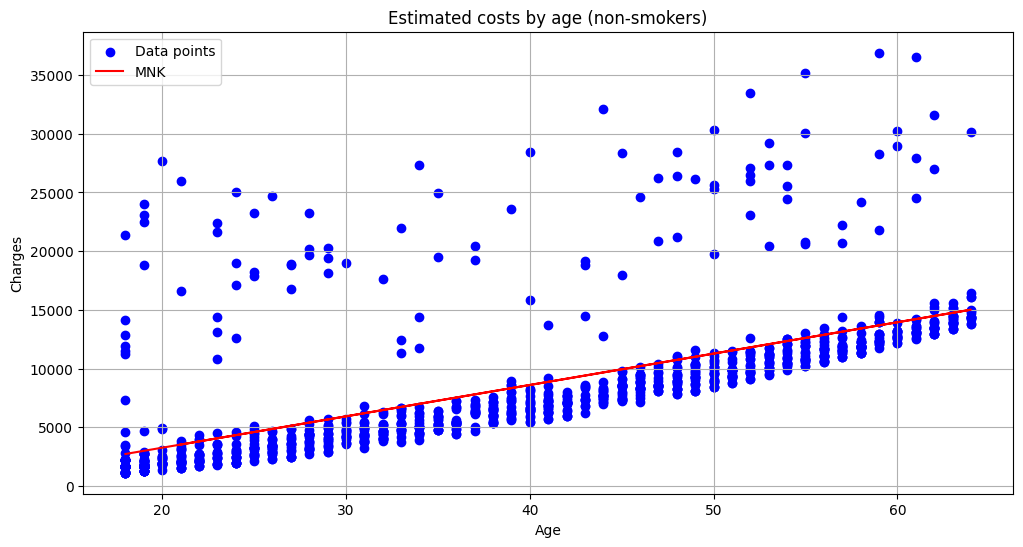

In [10]:
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_MNK, color='red', label='MNK')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Estimated costs by age (non-smokers)')
plt.legend()
plt.grid(True)
plt.show()

### Full-Batch gradient descent

In [11]:
# Градієнтний спуск
def full_batch_gradient_descent(X, y, lr=0.1, epochs=1000):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

In [12]:
predictions_fbgd = []

In [13]:
def test_learning_rate(lr):
  m, b, errors = full_batch_gradient_descent(X, y, lr=lr, epochs=1000)
  print('m:', m, 'b:', b)

  predictions_fbgd = m * X[:, 0] + b

  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(errors)
  plt.title('Loss Curve')
  plt.xlabel('Epoch')
  plt.ylabel('Sum of Squared Errors')
  plt.grid(True)

  plt.subplot(1, 2, 2)
  plt.scatter(X[:, 0], y, color='blue', label='Data points')
  plt.plot(X[:, 0], predictions_fbgd, color='red', label='Full-batch Gradient Descent')
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.title('Estimated costs by age (non-smokers)')
  plt.legend()
  plt.grid(True)

  plt.tight_layout()
  plt.show();

m: 221.1045843794301 b: -41.98126853149978


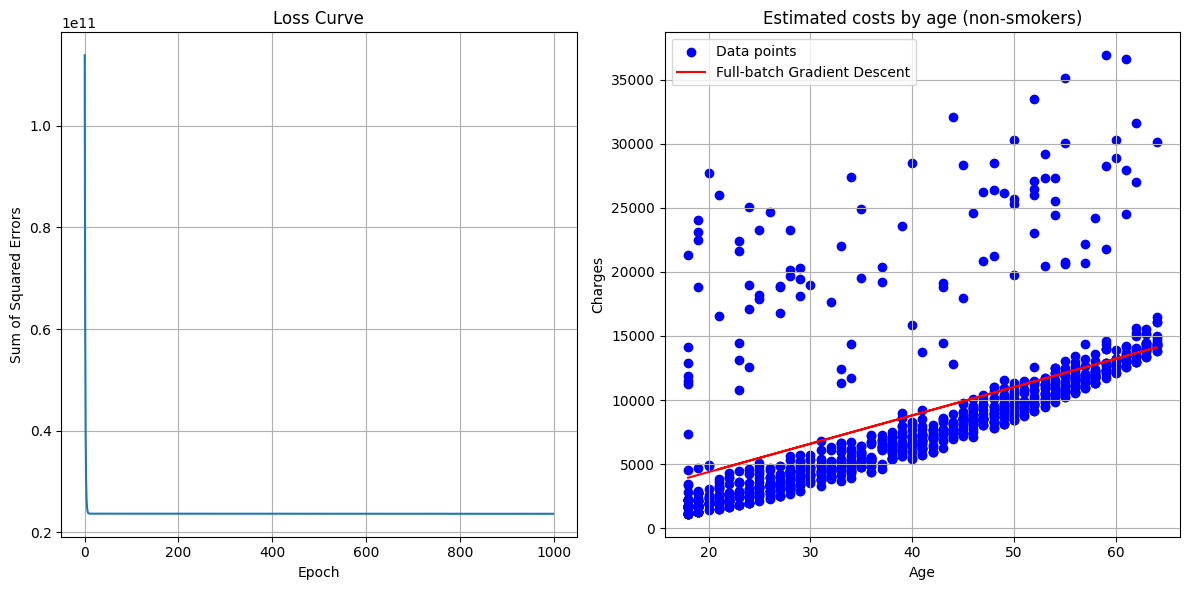

In [14]:
test_learning_rate(0.0001)

m: 220.15455551129122 b: 0.21300652799863293


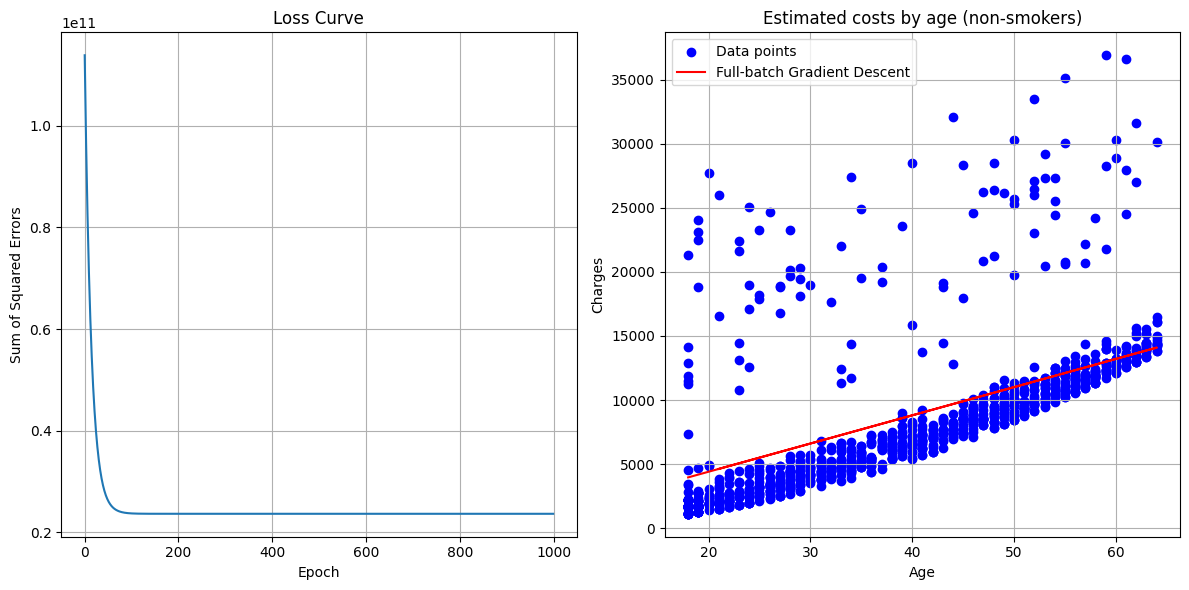

In [15]:
test_learning_rate(0.00001)

m: 65.00098750466782 b: 1.4160432218112806


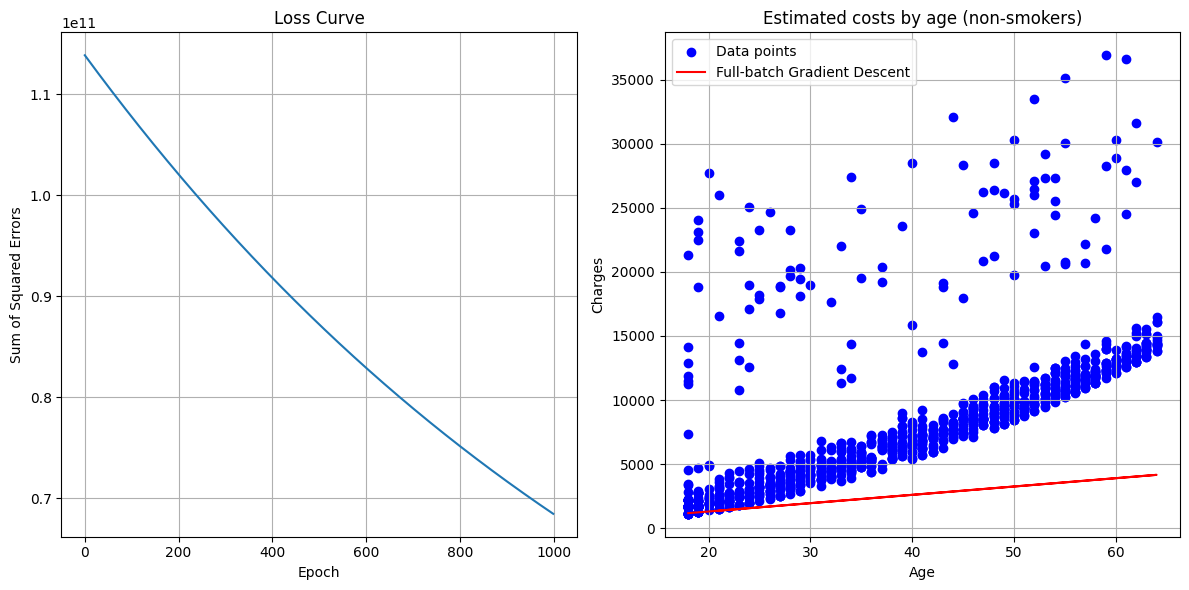

In [16]:
test_learning_rate(0.0000001)

судячи з графіків найкраще нам підходить значення `0.0001` для learning rate

In [17]:
m, b, errors = full_batch_gradient_descent(X, y, lr=0.0001, epochs=1000)

predictions_fbgd = m * X[:, 0] + b

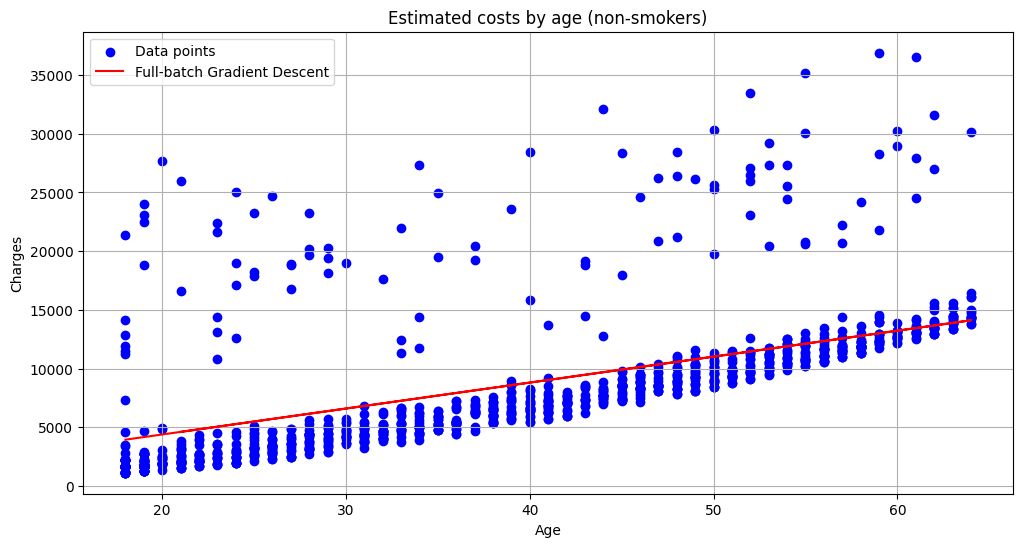

In [18]:
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_fbgd, color='red', label='Full-batch Gradient Descent')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Estimated costs by age (non-smokers)')
plt.legend()
plt.grid(True)
plt.show()

### LinearRegression

In [19]:
lin_reg = LinearRegression()

In [20]:
lin_reg.fit(X, y)

LinearRegression()

In [21]:
predictions_sklearn = lin_reg.predict(X)

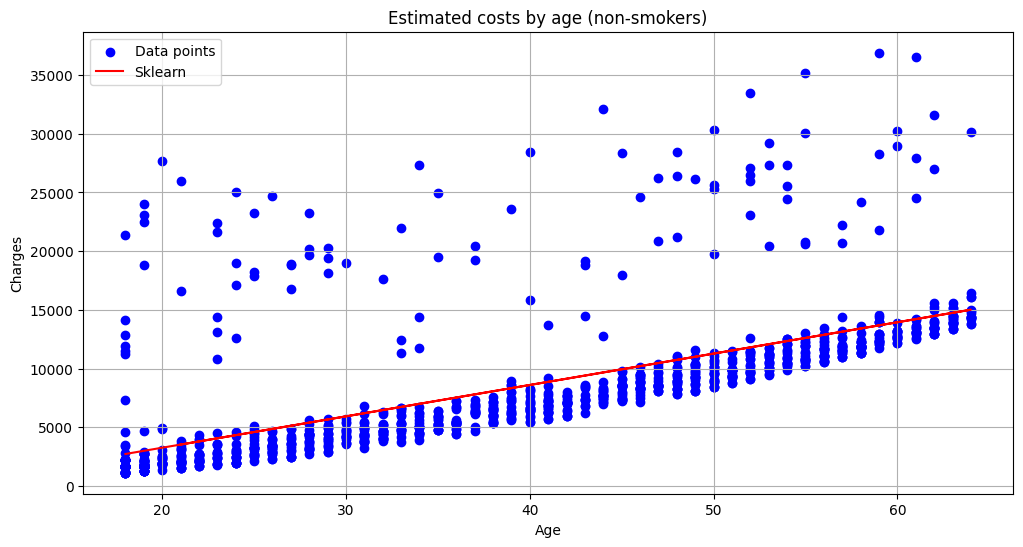

In [22]:
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_sklearn, color='red', label='Sklearn')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Estimated costs by age (non-smokers)')
plt.legend()
plt.grid(True)
plt.show()

### Comparison

In [23]:
rmse_mnk = np.sqrt(mean_squared_error(y, predictions_MNK))
rmse_fbgd = np.sqrt(mean_squared_error(y, predictions_fbgd))
rmse_sklearn = np.sqrt(mean_squared_error(y, predictions_sklearn))

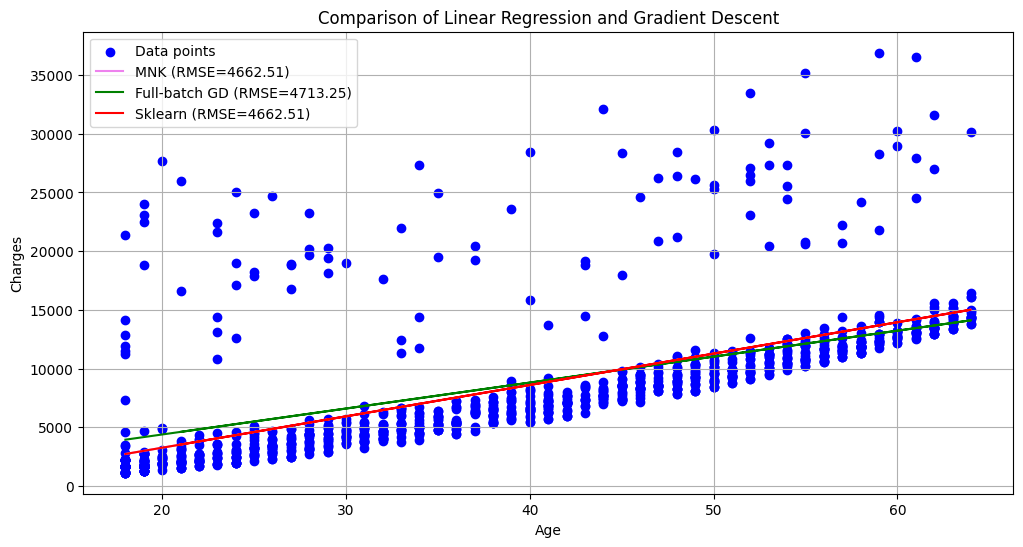

In [24]:
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_MNK, color='violet', label=f'MNK (RMSE={rmse_mnk:.2f})')
plt.plot(X[:, 0], predictions_fbgd, color='green', label=f'Full-batch GD (RMSE={rmse_fbgd:.2f})')
plt.plot(X[:, 0], predictions_sklearn, color='red', label=f'Sklearn (RMSE={rmse_sklearn:.2f})')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
print('Коефіцієнти з МНК: ', MNK_coefs)
print('Коефіцієнти з Full-Batch град. спуску: ', b, m)
print('Коефіцієнти з sklearn: ', lin_reg.intercept_, lin_reg.coef_)

Коефіцієнти з МНК:  [-2091.42055657   267.24891283]
Коефіцієнти з Full-Batch град. спуску:  -41.98126853149978 221.1045843794301
Коефіцієнти з sklearn:  -2091.4205565650864 [267.24891283]


In [26]:
print('RMSE МНК: ', rmse_mnk)
print('RMSE full-batch град. спуску: ', rmse_fbgd)
print('RMSE sklearn: ', rmse_sklearn)

RMSE МНК:  4662.505766636395
RMSE full-batch град. спуску:  4713.250582815521
RMSE sklearn:  4662.505766636395


**Спостереження**
- Дивлячись на лінії на графіку та коефіцієнти ми бачимо, що метод `МНК` та `scikit-learn.LinearRegression` дали однакові результати  
- Графік для градієнтного спуску трохи відрізняється і значення RMSE більше
- Моїми припущеннями були значення коефіцієнтів `270` та `-2200`, а RMSE - `4662.6666`
- Модель підрахувала досить точніші значення `267.25` та `-2091.42`, RMSE - `4662.5058`

**Висновки**  
RMSE ≈ 4600–4700 — це нормальне значення

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

### Estimated costs for smokers

In [27]:
smoker_df = medical_df[medical_df.smoker == 'yes']

In [28]:
X_smoker = smoker_df[['age']]
y_smoker = smoker_df['charges'].values

In [29]:
lin_reg_smoker = LinearRegression()
lin_reg_smoker.fit(X_smoker, y_smoker)
lin_reg_smoker.coef_, lin_reg_smoker.intercept_
predictions_sklearn_smoker = lin_reg_smoker.predict(X_smoker)

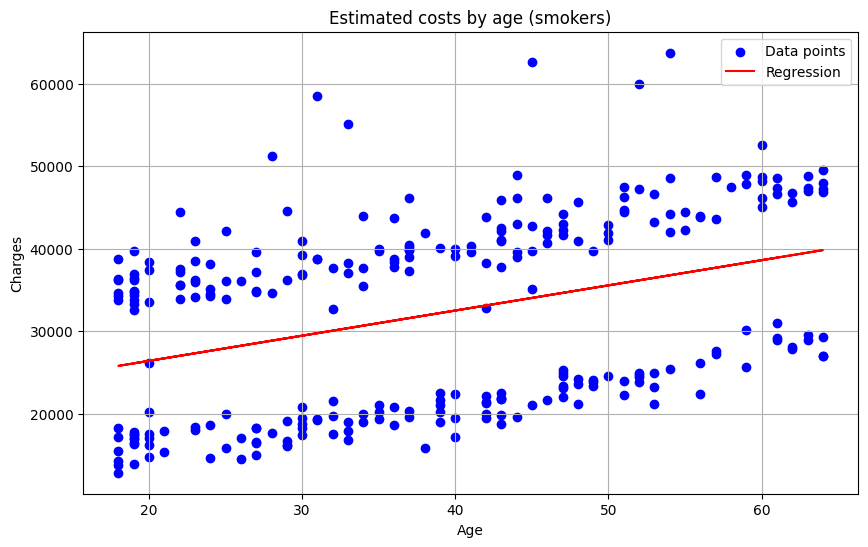

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(X_smoker, y_smoker, color='blue', label='Data points')
plt.plot(X_smoker, predictions_sklearn_smoker, color='red', label='Regression')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Estimated costs by age (smokers)')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
print('Коефіцієнти: ', lin_reg_smoker.intercept_, lin_reg_smoker.coef_)
rmse_sklearn_smoker = np.sqrt(mean_squared_error(y_smoker, predictions_sklearn_smoker))
print('Точність RMSE: ', rmse_sklearn_smoker)

Коефіцієнти:  20294.128126915966 [305.23760211]
Точність RMSE:  10711.00334810241


**Спостереження**
- Фактичні дані мають велике розсіювання, а лінія регресії не проходить близько до більшості точок.
- Виділяються 2 групи курців, вище і нижче прогнозованої лінії
- Значення RMSE дуже високе — `10,711`, що більше ніж 25%–30% типових значень, це може призвести до неточних передбачень

**Висновки**  
- Ця модель неточна, краще її не використовувати в компанії
- Рекомендовано покращити модель